309653002 林暐軒

1.Plot out the energy density $\rho(\lambda)$ of blackbody radiation per unit wavelength versus wavelength.

2.Find the wavelength where the energy density is maximum (where $\rho(\lambda=\lambda_{max})=0)$ for the temperature T=3500K,4000K,..using bi-section or Newton method.

3.Numerically confirm the Wien’s law   $ \ $  $\lambda_{max}T\approx$2.898 mm∙K.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

定義微分function

In [2]:
def derivative(func,x,h):
    return (func(x+h)-func(x-h))/(2*h)   

定義求根的function

In [3]:
def newton_method(x0,n,h,func):
    tol=10**(-n)
    while np.abs(func(x0))>tol:
        f_der=derivative(func,x0,h)
        x0=x0-(func(x0)/f_der)
    print('zero is ',x0,'and func(x0) is',func(x0))

In [4]:
def bisection(a,b,n,func):
    if func(a)*func(b)>0:
        print('please choose another interval ,maybe no root in this interval')
    else:
        x0=a
        tol=10**(-n)
        while np.abs(func(x0))>tol:
            x0=(a+b)/2
            a1=x0
            if func(a1)*func(b)<0:
                a=x0
            else:
                b=x0
        print('zero is ',x0,'and func(x0) is',func(x0))
    return x0

Answer of problem1

定義能量密度

In [5]:
def energy_density_per_wavelength(lamb,T):
    #hckb=(hc/kb)*10^6
    hckb=(1.98644586/1.380649)*10**(4)
    #8*pi*hc/(10^(-6))^5
    const=(8*np.pi*1.98644586)*10**(5)
    
    param=hckb*(1/(lamb*T))
    return (const/((lamb)**5))*(1/(np.exp(param)-1))

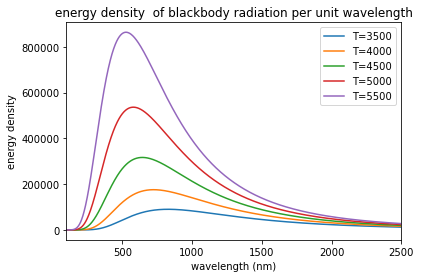

In [6]:
#wavelength 單位微米
Lambdas=np.linspace(0.1,2.5,1000)
[T1,T2,T3,T4,T5]=[3500,4000,4500,5000,5500]
E1=energy_density_per_wavelength(Lambdas,T1)
E2=energy_density_per_wavelength(Lambdas,T2)

E3=energy_density_per_wavelength(Lambdas,T3)
E4=energy_density_per_wavelength(Lambdas,T4)
E5=energy_density_per_wavelength(Lambdas,T5)

plt.plot(1000*Lambdas,E1,label='T='+str(T1))
plt.plot(1000*Lambdas,E2,label='T='+str(T2))
plt.plot(1000*Lambdas,E3,label='T='+str(T3))
plt.plot(1000*Lambdas,E4,label='T='+str(T4))
plt.plot(1000*Lambdas,E5,label='T='+str(T5))
plt.xlabel('wavelength (nm)')
plt.ylabel('energy density')
plt.title('energy density  of blackbody radiation per unit wavelength')
plt.xlim([100,2500])
plt.legend()

Answer of problem2 $ \ $and $ \ $ Answer of problem3


定義給定溫度之下的能量函數

In [7]:
def enegy_density_with_T1(x):
    T=3500
    return energy_density_per_wavelength(x,T)
def enegy_density_with_T2(x):
    T=4000
    return energy_density_per_wavelength(x,T)
def enegy_density_with_T3(x):
    T=4500
    return energy_density_per_wavelength(x,T)
def enegy_density_with_T4(x):
    T=5000
    return energy_density_per_wavelength(x,T)
def enegy_density_with_T5(x):
    T=5500
    return energy_density_per_wavelength(x,T)

In [8]:
def rho_T1_prime(x):
    h=0.01
    return derivative(enegy_density_with_T1,x,h)
def rho_T2_prime(x):
    h=0.01
    return derivative(enegy_density_with_T2,x,h)
def rho_T3_prime(x):
    h=0.01
    return derivative(enegy_density_with_T3,x,h)
def rho_T4_prime(x):
    h=0.01
    return derivative(enegy_density_with_T4,x,h)
def rho_T5_prime(x):
    h=0.01
    return derivative(enegy_density_with_T5,x,h)

zero is  0.8280175697058438 and func(x0) is -7.726484909653664e-05

When the temperature T=3500 K,
energy density function attaina its maximum at wavelength is 828.0175697058438 nm

Numerically confirm the Wien’s law:
lambda_max*T approx= 2.898061493970453 mm-K


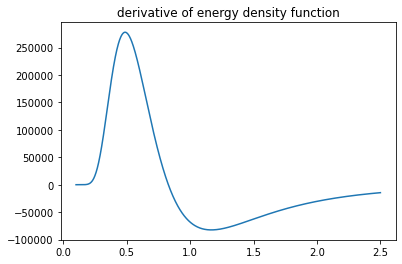

In [9]:
plt.plot(Lambdas,rho_T1_prime(Lambdas))
plt.title('derivative of energy density function')
x0=bisection(0.2,1,4,rho_T1_prime)
print('')
print('When the temperature T='+str(T1)+' K,')
print('energy density function attaina its maximum at wavelength is '+str(1000*x0)+' nm')
print('')
print('Numerically confirm the Wien’s law:')
print('lambda_max*T approx= '+str(x0*T1*10**(-3))+' mm-K')

zero is  0.7245375296100973 and func(x0) is -9.94332367554307e-05

When the temperature T=4000 K,
energy density function attaina its maximum at wavelength is 724.5375296100973 nm

Numerically confirm the Wien’s law:
lambda_max*T approx= 2.8981501184403893 mm-K


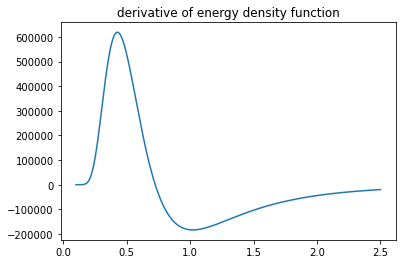

In [10]:
plt.plot(Lambdas,rho_T2_prime(Lambdas))
plt.title('derivative of energy density function')
x0=bisection(0.2,1,4,rho_T2_prime)
print('')
print('When the temperature T='+str(T2)+' K,')
print('energy density function attaina its maximum at wavelength is '+str(1000*x0)+' nm')
print('')
print('Numerically confirm the Wien’s law:')
print('lambda_max*T approx= '+str(x0*T2*10**(-3))+' mm-K')

zero is  0.6440556788351386 and func(x0) is 1.7738784663379192e-05

When the temperature T=4500 K,
energy density function attaina its maximum at wavelength is 644.0556788351386 nm

Numerically confirm the Wien’s law:
lambda_max*T approx= 2.898250554758124 mm-K


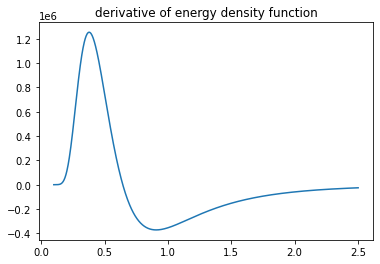

In [11]:
plt.plot(Lambdas,rho_T3_prime(Lambdas))
plt.title('derivative of energy density function')
x0=bisection(0.2,1,4,rho_T3_prime)
print('')
print('When the temperature T='+str(T3)+' K,')
print('energy density function attaina its maximum at wavelength is '+str(1000*x0)+' nm')
print('')
print('Numerically confirm the Wien’s law:')
print('lambda_max*T approx= '+str(x0*T3*10**(-3))+' mm-K')

zero is  0.5796725603053346 and func(x0) is 2.8545036911964417e-05

When the temperature T=5000 K,
energy density function attaina its maximum at wavelength is 579.6725603053346 nm

Numerically confirm the Wien’s law:
lambda_max*T approx= 2.898362801526673 mm-K


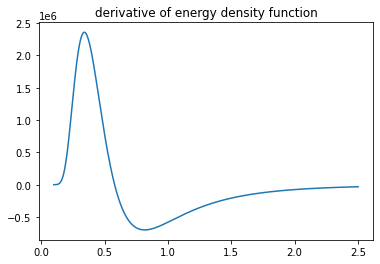

In [12]:
plt.plot(Lambdas,rho_T4_prime(Lambdas))
plt.title('derivative of energy density function')
x0=bisection(0.2,1,4,rho_T4_prime)
print('')
print('When the temperature T='+str(T4)+' K,')
print('energy density function attaina its maximum at wavelength is '+str(1000*x0)+' nm')
print('')
print('Numerically confirm the Wien’s law:')
print('lambda_max*T approx= '+str(x0*T4*10**(-3))+' mm-K')

zero is  0.5269976102747024 and func(x0) is 4.8673246055841446e-05

When the temperature T=5500 K,
energy density function attaina its maximum at wavelength is 526.9976102747024 nm

Numerically confirm the Wien’s law:
lambda_max*T approx= 2.8984868565108632 mm-K


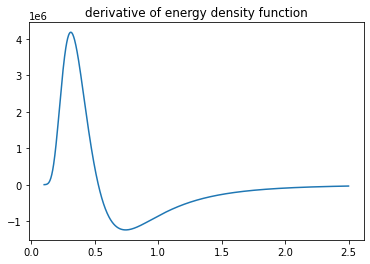

In [13]:
plt.plot(Lambdas,rho_T5_prime(Lambdas))
plt.title('derivative of energy density function')
x0=bisection(0.2,1,4,rho_T5_prime)
print('')
print('When the temperature T='+str(T5)+' K,')
print('energy density function attaina its maximum at wavelength is '+str(1000*x0)+' nm')
print('')
print('Numerically confirm the Wien’s law:')
print('lambda_max*T approx= '+str(x0*T5*10**(-3))+' mm-K')